## Mail 

Salut Maxime,

Est-ce que tu pourrais essayer de faire un histograme qui montre pour chaque probleme, le nombre d'utilizateurs qui l'on résolu, ordonné par ce dernier nombre? 

Je voudrais savoir si s'est une distribution lineaire, zipf...

# Useful imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

# Database connection

In [3]:
con = psycopg2.connect("dbname=test1")
con.cursor()

<cursor object at 0x7f58cefc7338; closed: 0>

# Problems selection

Nous voulons ici sélectionner les problèmes qui nous intéressent. C'est à dire les problème de type ***p*** indépendament de la langue.

In [4]:
df = pd.read_sql_query('select problem_nm from "problems";',con=con)
print df.count()

problem_nm    2911
dtype: int64


In [5]:
df = pd.read_sql_query('select problem_nm from "problems" group by problem_nm;',con=con)
print df.count()

problem_nm    1907
dtype: int64


## P% problems group by problem_nm

In [6]:
df_probs = pd.read_sql_query("select problem_nm from problems WHERE problem_nm LIKE 'P%' group by problem_nm \
                       order by problem_nm;",con=con)
print df_probs.count()

problem_nm    1324
dtype: int64


In [7]:
# print df_probs

In [8]:
df_p = pd.read_sql_query("select veredict from submissions WHERE problem_id LIKE 'P79515%' and veredict like 'AC';",
                         con=con)

In [9]:
df_p.count()

veredict    10
dtype: int64

In [10]:
df_sub1 = pd.read_sql_query("select count(*) from submissions where veredict like 'AC';",
                         con=con)

In [11]:
df_sub2 = pd.read_sql_query("select count(*) from submissions;",
                         con=con)

df_sub = df_sub1.append(df_sub2, ignore_index=True)

### pourcentage de submissions acceptées :

In [12]:
s = df_sub['count']

In [13]:
pc = np.true_divide(s[0], s[1])
print("AC submissions = %.4f%%" % pc)

AC submissions = 0.4416%


In [14]:
print df_probs.values.size
df_subs = pd.read_sql_query("select problem_id from submissions WHERE problem_id like 'P%' and veredict like 'AC';",
                         con=con)
df_subs.count()
# for i in df_probs.values:
#    pd.read_sql_query("select count(*) from submissions WHERE problem_id LIKE '%s%%' and veredict like 'AC';" % i[0],
#                         con=con)
    

1324


problem_id    619240
dtype: int64

Now we have a dataframe with every unique ***p*** problems numbers

In [15]:
df_probs.describe()

,problem_nm
count,1324
unique,1324
top,P23069
freq,1


And a dataframe with every *AC* submissions

In [16]:
df_subs.describe()

,problem_id
count,619240
unique,1979
top,P56118_ca
freq,10002


In [17]:
df_probs.head()

,problem_nm
0,P10051
1,P10387
2,P10426
3,P10498
4,P10595


In [18]:
# df_subs.mask('problem_id', 'P10051')
test = 'P26492'
cnt = 0
for i in df_subs.values:
    if test in i[0]:
        cnt += 1
print cnt

2703


In [19]:
df_subs.count()

problem_id    619240
dtype: int64

In [20]:
plop = df_subs.values
pl = plop.tolist()
l = []
for p in pl:
    l += p

In [21]:
l = [i[:-3] for i in l]

In [22]:
s = pd.Series(l)
vc = s.value_counts()
vc.describe()

count     1316.000000
mean       470.547112
std       1114.422715
min          1.000000
25%          9.000000
50%         37.500000
75%        318.500000
max      11347.000000
dtype: float64

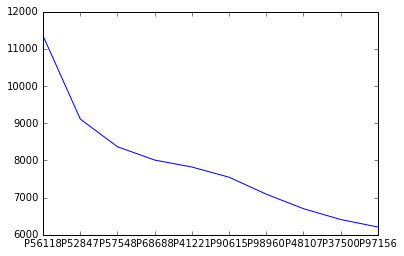

In [23]:
vc.head(n=10).plot()

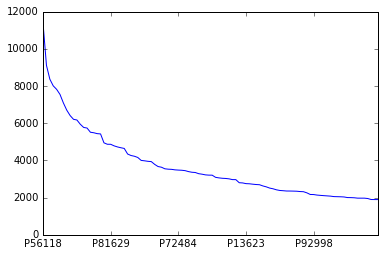

In [24]:
vc.head(n=100).plot()

In [25]:
print vc.head(n=100).cumsum()[-1]
print vc.cumsum()[-1]

368943
619240


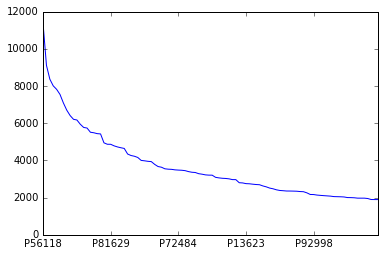

In [26]:
vc.head(n=100).plot()

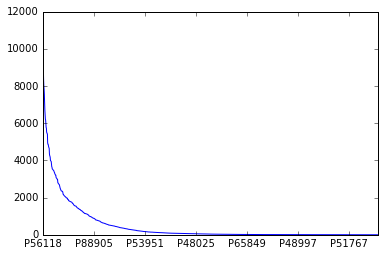

In [27]:
vc.plot()